# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from os import path
import pickle

In [2]:
df = pd.read_csv("/Users/annajose/Desktop/BOOTCAMP 2/Week7Day4/mini-project-IV/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [3]:
df1 = df.copy()

In [4]:
df = df1.copy()

Look at some basic statistics for numerical variables.

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [6]:
plt.style.use('classic')

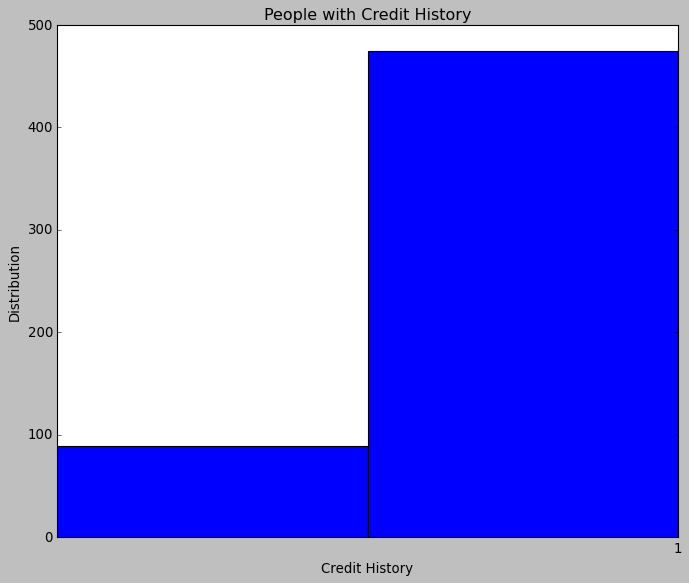

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_title('People with Credit History')
ax.set_xlabel('Credit History')
ax.set_ylabel('Distribution')
ax.set_xticks([1,2])
ax.hist(df['Credit_History'], bins=2)
fig.savefig('CreditHistory.jpg')

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_title('Income Distribution')
ax.set_xlabel('Income')
ax.set_ylabel('Frequency')
ax.hist(df['ApplicantIncome'], range=(0, 12500))
fig.savefig('ApplicantIncomeDistribution.jpg')

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_title('Income Distribution')
ax.set_xlabel('Income')
ax.set_ylabel('Frequency')
ax.hist(df['CoapplicantIncome'], range=(0, 8000))
fig.savefig('CoApplicantIncomeDistribution.jpg')

In [ ]:
df1 = df.copy()
df1['ApplicantIncomeLog'] = np.log(df1['ApplicantIncome'])
df1['LoanAmountLog'] = np.log(df1['LoanAmount'])

fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_title('Income and Loan')
ax.set_xlabel('Income')
ax.set_ylabel('Loan')
ax.scatter(x=df1['ApplicantIncomeLog'], y=df1['LoanAmountLog'])
fig.savefig('Income_Loan_Scatter.jpg')

In [ ]:
df.corr()

In [ ]:
df.columns

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



In [ ]:
#DONE


Look at box plots to understand the distributions. 

In [ ]:
#DONE BELOW

Look at the distribution of income segregated  by `Education`

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.boxplot(y=df['Education'], x=df['LoanAmount'])
fig.savefig('Education_Loan.jpg')

Look at the histogram and boxplot of LoanAmount

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.boxplot(y=df['Education'], x=df['ApplicantIncome'])
fig.savefig('Education_Income.jpg')

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.barplot(x=df['Loan_Status'], y=df['LoanAmount'])
fig.savefig('Income_Loan_approval.jpg')

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [ ]:
df.head(5)

In [ ]:
df.groupby(by=['Loan_Status', 'Dependents'])['Loan_Status'].count()

In [ ]:
#USED A HIST PLOT INSTEAD
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_title('Dependents and Approved')
ax.set_xlabel('Approved')

ax = plt.bar(x=[0,1,2,3], height=[238,66,76,33])
fig.savefig('Dependents_and_approved.jpg')

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [ ]:
df.isnull().sum()

In [ ]:
#checking for missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

In [ ]:
df['Credit_History'].value_counts()

In [ ]:
grid = sns.FacetGrid(df, hue='Gender', col='Married', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [ ]:
grid = sns.FacetGrid(df, hue='Gender', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [ ]:
grid = sns.FacetGrid(df, hue='Married', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [ ]:
grid = sns.FacetGrid(df, hue='Self_Employed', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [ ]:
grid = sns.FacetGrid(df, row='Married', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [ ]:
grid = sns.FacetGrid(df, row='Married', col='Credit_History', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [ ]:
grid = sns.FacetGrid(df, row='Credit_History', col='Property_Area', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [ ]:
grid = sns.FacetGrid(df, row='Education', col='Credit_History', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [ ]:
grid = sns.FacetGrid(df, row='Credit_History', col='Property_Area', size=2.2, aspect=1.6)
grid.map(plt.hist, 'LoanAmount', alpha=.5, bins=10)
grid.add_legend()

In [ ]:

#histogram and normal probability plot of Applicant Income
sns.distplot(df['ApplicantIncome']);
fig = plt.figure()


In [ ]:
from scipy import stats
from scipy.stats import probplot
import matplotlib.pyplot as plt
res = stats.probplot(df['ApplicantIncome'], plot=plt)
plt.savefig('figname.png')

In [ ]:
#histogram and normal probability plot of CoApplicant Income
from scipy import stats
from scipy.stats import probplot
sns.distplot(df['CoapplicantIncome']);
fig = plt.figure()
res = stats.probplot(df['CoapplicantIncome'], plot=plt)
plt.savefig('figname.png')

In [ ]:
flg, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,6))

sns.distplot(df['ApplicantIncome'], ax = axes[0]).set_title('ApplicantIncome Distribution')
axes[0].set_ylabel('ApplicantIncomee Count')

sns.distplot(df['CoapplicantIncome'], color = "r", ax = axes[1]).set_title('CoapplicantIncome Distribution')
axes[1].set_ylabel('CoapplicantIncome Count')

sns.distplot(df['LoanAmount'],color = "g", ax = axes[2]).set_title('LoanAmount Distribution')
axes[2].set_ylabel('LoanAmount Count')

plt.tight_layout()
plt.show()
plt.gcf().clear()

In [ ]:
sns.FacetGrid(df, hue="Gender", size=6) \
   .map(sns.kdeplot, "ApplicantIncome") \
   .add_legend()

In [ ]:
sns.FacetGrid(df, hue="Married", size=6) \
   .map(sns.kdeplot, "ApplicantIncome") \
   .add_legend()

In [ ]:
df.columns

In [ ]:

var_name = "CoapplicantIncome"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='ApplicantIncome', data=df, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.title("Distribution of ApplicantIncome with "+var_name, fontsize=15)
plt.show()

In [ ]:
var_name = "LoanAmount"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='ApplicantIncome', data=df, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.title("Distribution of ApplicantIncome with "+var_name, fontsize=15)
plt.show()

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
fig, axes = plt.subplots(ncols=3,figsize=(12,6))

g = sns.countplot(df["Gender"], ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(df["Married"], ax=axes[1])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(df["Dependents"], ax=axes[2])
plt.setp(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
plt.gcf().clear()

In [ ]:

fig, axes = plt.subplots(ncols=3,figsize=(12,6))

g = sns.countplot(df["Education"], ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(df["Self_Employed"], ax=axes[1])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(df["Property_Area"], ax=axes[2])
plt.setp(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
plt.gcf().clear()

In [ ]:
def clean_and_drop_dataframe(X):
    x = X.copy()
    x['Gender'].fillna('Male', inplace=True)
    x['Married'].fillna('No', inplace=True)
    x['Self_Employed'].fillna('No', inplace=True)
    x['LoanAmount'].fillna(0, inplace=True)
    x['Loan_Amount_Term'].fillna(360, inplace=True)
    x['Credit_History'].fillna(0, inplace=True)
    x.drop(columns='Loan_ID', inplace=True)
    return x

In [ ]:
df.dtypes

In [ ]:
def convert_dependents_to_int(X):
    x = X.copy()
    x['Dependents'] = x['Dependents'].str.replace('+', '')
    x['Dependents'] = x['Dependents'].str.replace('None', '')
    x['Dependents'] = x['Dependents'].str.strip()
    x['Dependents'].fillna('0', inplace=True)
    x['Dependents'] = x['Dependents'].astype('str')
    x['Dependents'] = x['Dependents'].astype('int')
    return x

In [ ]:
class GenderTransformer():
    def __init__(self):
        self.ohe = OneHotEncoder(handle_unknown='ignore')
        if path.exists('gender.pkl'):
            self.ohe = pickle.load(open('gender.pkl', 'rb'))
    def fit(self, X, y=None):
        self.ohe.fit(X[['Gender']])
        pickle.dump(self.ohe, open('gender.pkl', 'wb'))
    def transform(self, X, y=None):
        X_ = X.copy()
        ohe_array = self.ohe.transform(X_[['Gender']]).toarray()
        X_['gender1'] = ohe_array[:,0]
        X_['gender2'] = ohe_array[:,1]
        X_.drop(columns='Gender', inplace=True)
        return X_
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        X_ = self.transform(X, y)
        return X_
        

In [ ]:
class MarriedTransformer():
    def __init__(self):
        self.ohe = OneHotEncoder(handle_unknown='ignore')
        if path.exists('married.pkl'):
            self.ohe = pickle.load(open('married.pkl', 'rb'))
    def fit(self, X, y=None):
        self.ohe.fit(X[['Married']])
        pickle.dump(self.ohe, open('married.pkl', 'wb'))
    def transform(self, X, y=None):
        X_ = X.copy()
        ohe_array = self.ohe.transform(X_[['Married']]).toarray()
        X_['marital_status1'] = ohe_array[:, 0]
        X_['marital_status2'] = ohe_array[:, 1]
        X_.drop(columns='Married', inplace=True)
        return X_
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        X_ = self.transform(X, y)
        return X_

In [ ]:
class EducationTransformer():
    def __init__(self):
        self.ohe = OneHotEncoder(handle_unknown='ignore')
        if path.exists('education.pkl'):
            self.ohe = pickle.load(open('education.pkl', 'rb'))
    def fit(self, X, y=None):
        self.ohe.fit(X[['Education']])
        pickle.dump(self.ohe, open('education.pkl', 'wb'))
    def transform(self, X, y=None):
        X_ = X.copy()
        ohe_array = self.ohe.transform(X_[['Education']]).toarray()
        X_['education1'] = ohe_array[:, 0]
        X_['education2'] = ohe_array[:, 1]
        X_.drop(columns='Education', inplace=True)
        return X_
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        X_ = self.transform(X, y)
        return X_

In [ ]:
class EmploymentTransformer():
    def __init__(self):
        self.ohe = OneHotEncoder(handle_unknown='ignore')
        if path.exists('employed.pkl'):
            self.ohe = pickle.load(open('employed.pkl', 'rb'))
    def fit(self, X, y=None):
        self.ohe.fit(X[['Self_Employed']])
        pickle.dump(self.ohe, open('employed.pkl', 'wb'))
    def transform(self, X, y=None):
        X_ = X.copy()
        ohe_array = self.ohe.transform(X_[['Self_Employed']]).toarray()
        X_['employed1'] = ohe_array[:, 0]
        X_['employed2'] = ohe_array[:, 1]
        X_.drop(columns='Self_Employed', inplace=True)
        return X_
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        X_ = self.transform(X, y)
        return X_

In [ ]:
class CreditTransformer():
    def __init__(self):
        self.ohe = OneHotEncoder(handle_unknown='ignore')
        if path.exists('credit.pkl'):
            self.ohe = pickle.load(open('credit.pkl', 'rb'))
    def fit(self, X, y=None):
        self.ohe.fit(X[['Credit_History']])
        pickle.dump(self.ohe, open('credit.pkl', 'wb'))
    def transform(self, X, y=None):
        X_ = X.copy()
        ohe_array = self.ohe.transform(X_[['Credit_History']]).toarray()
        X_['credit1'] = ohe_array[:, 0]
        X_['credit2'] = ohe_array[:, 1]
        X_.drop(columns='Credit_History', inplace=True)
        return X_
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        X_ = self.transform(X, y)
        return X_

In [ ]:
class PropertyTransformer():
    def __init__(self):
        self.ohe = OneHotEncoder(handle_unknown='ignore')
        if path.exists('property.pkl'):
            self.ohe = pickle.load(open('property.pkl', 'rb'))
    def fit(self, X, y=None):
        self.ohe.fit(X[['Property_Area']])
        pickle.dump(self.ohe, open('property.pkl', 'wb'))
    def transform(self, X, y=None):
        X_ = X.copy()
        ohe_array = self.ohe.transform(X_[['Property_Area']]).toarray()
        X_['property1'] = ohe_array[:, 0]
        X_['property2'] = ohe_array[:, 1]
        X_['property3'] = ohe_array[:, 2]
        X_.drop(columns='Property_Area', inplace=True)
        return X_
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        X_ = self.transform(X, y)
        return X_

In [ ]:
# df_backup = df.copy()

In [ ]:
# df = df_backup.copy()

In [ ]:
df

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Loan_Status = ('Y','N')
#Loan_Status_df = pd.DataFrame(Loan_Status, columns=['Loan_Status'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['Loan_Status'] = labelencoder.fit_transform(df['Loan_Status'])
df

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

Combine both incomes as total income and take a log transformation of the same.

## 4. Building a Predictive Model

In [ ]:
rforest = RandomForestClassifier()
#rforest = LogisticRegression()

Try paramater grid search to improve the results

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [ ]:
df = clean_and_drop_dataframe(df)
df = convert_dependents_to_int(df)

In [ ]:
y = df['Loan_Status']
X = df.drop(columns='Loan_Status')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)

In [ ]:
X_test

In [ ]:
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split

In [ ]:
# CREATE FUNCTION TRANSFORMER
# clean_and_drop_dataframe()
# convert_dependents_to_int()


pipe = Pipeline([
    ('gender', GenderTransformer()),
    ('married', MarriedTransformer()),
    ('education', EducationTransformer()),
    ('employment', EmploymentTransformer()),
    ('credit', CreditTransformer()),
    ('property', PropertyTransformer()),
    ('classifier', rforest)
])

In [ ]:
pipe.fit(X_train, y_train)

In [ ]:
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
accuracy_score(y_pred, y_test)

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
import matplotlib.pyplot as plt
RFC_roc_auc = roc_auc_score(y_test, pipe.predict(X_test))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pipe.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % RFC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RFC_ROC')
plt.show()

In [ ]:
#XGBOOST CLASSIFIER

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
xgbc = XGBClassifier()

In [ ]:
pipe = Pipeline([
    ('gender', GenderTransformer()),
    ('married', MarriedTransformer()),
    ('education', EducationTransformer()),
    ('employment', EmploymentTransformer()),
    ('credit', CreditTransformer()),
    ('property', PropertyTransformer()),
    ('classifier', xgbc)
])

In [ ]:
#fit model to training data
pipe.fit(X_train, y_train)

In [ ]:
# make predictions for test data
y_pred_xgbc = pipe.predict(X_test)
#predictions = [round(value) for value in y_pred_xgbc]
y_pred_xgbc

In [ ]:
accuracy_score(y_pred_xgbc, y_test)

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred_xgbc)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_xgbc)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred_xgbc))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
y_test

In [ ]:
import matplotlib.pyplot as plt
XGBC_roc_auc = roc_auc_score(y_test, pipe.predict(X_test))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pipe.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XG Boost (area = %0.2f)' % XGBC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGBC_ROC')
plt.show()

In [ ]:
#I defined a function which will help us to create xgboost models and perform cross validation

In [ ]:
# def modelfit(alg, train, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
#     if useTrainCV:
#         xgb_param = alg.get_xgb_params()
#         xgtrain = xgb.DMatrix(train[predictors].values, label=train[target].values)
#         cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'],
#                           nfold=cv_folds,metrics='auc', early_stopping_rounds=early_stopping_rounds)
#         alg.set_params(n_estimators=cvresult.shape[0])
    
#     #Fit the algorithm on the data
#     alg.fit(train[predictors], train['Loan_Status'],eval_metric='auc')
        
#     #Predict training set:
#     train_predictions = alg.predict(train[predictors])
#     train_predprob = alg.predict_proba(train[predictors])[:,1]
        
#     #Print model report:
#     print ("\nModel Report")
#     print ("Accuracy : %.4g" % metrics.accuracy_score(train['Loan_Status'].values, train_predictions))
#     print ("AUC Score (Train): %f" % metrics.roc_auc_score(train['Loan_Status'], train_predprob))
                    
#     feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')

In [ ]:
# from xgboost import XGBClassifier
# import sklearn.metrics as metrics
# #Choose all predictors except target & IDcols
# predictors = [x for x in y_train.columns if x not in [target, IDcol]]
# xgb2 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8,
#                      colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
# modelfit(xgb2, y_train, predictors)

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [ ]:
# clean_and_drop_dataframe = pickle.load(open('clean_and_drop_dataframe.pkl', 'rb'))
# convert_dependents_to_int = pickle.load(open('convert_dependents_to_int.pkl', 'rb'))
# GenderTransformer = pickle.load(open('GenderTransformer.pkl', 'rb'))
# MarriedTransformer = pickle.load(open('MarriedTransformer.pkl', 'rb'))
# EducationTransformer = pickle.load(open('EducationTransformer.pkl', 'rb'))
# EmploymentTransformer = pickle.load(open('EmploymentTransformer.pkl', 'rb'))
# CreditTransformer = pickle.load(open('CreditTransformer.pkl', 'rb'))
# PropertyTransformer = pickle.load(open('PropertyTransformer.pkl', 'rb'))
# rforest = pickle.load(open('rforest.pkl', 'rb'))

In [ ]:
# CREATE FUNCTION TRANSFORMER
# clean_and_drop_dataframe()
# convert_dependents_to_int()
# clean_and_drop = FunctionTransformer(clean_and_drop_dataframe)
# convert_dependents = FunctionTransformer(convert_dependents_to_int)

# pipe = Pipeline([
#     ('clean_drop', clean_and_drop),
#     ('dependents', convert_dependents),
#     ('gender', GenderTransformer()),
#     ('married', MarriedTransformer()),
#     ('education', EducationTransformer()),
#     ('employment', EmploymentTransformer()),
#     ('credit', CreditTransformer()),
#     ('property', PropertyTransformer()),
#     ('classifier', rforest)
# ])

In [ ]:
# y_pred = pipe.predict(X_test)
# accuracy_score(y_pred, y_test)

In [ ]:
# pickle.dump(clean_and_drop_dataframe, open('clean_and_drop_dataframe.pkl', 'wb'))
# pickle.dump(convert_dependents_to_int, open('convert_dependents_to_int.pkl', 'wb'))
# pickle.dump(GenderTransformer, open('GenderTransformer.pkl', 'wb'))
# pickle.dump(MarriedTransformer, open('MarriedTransformer.pkl', 'wb'))
# pickle.dump(EducationTransformer, open('EducationTransformer.pkl', 'wb'))
# pickle.dump(EmploymentTransformer, open('EmploymentTransformer.pkl', 'wb'))
# pickle.dump(CreditTransformer, open('CreditTransformer.pkl', 'wb'))
# pickle.dump(PropertyTransformer, open('PropertyTransformer.pkl', 'wb'))
pickle.dump(rforest, open('rforest.pkl', 'wb'))